<a href="https://colab.research.google.com/github/diaChoo/FutureMakers2022/blob/main/Day_9_Introduction_to_Loss_Functions_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

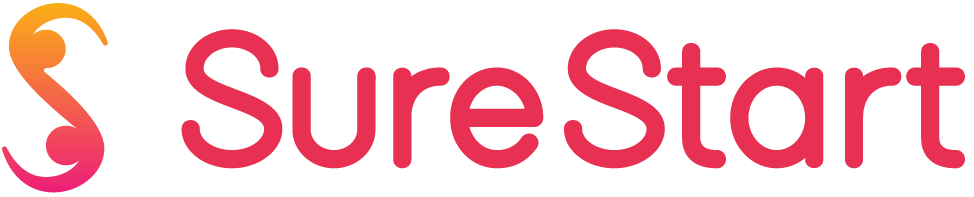

#Day 9 Objectives: 
* To introduce you to loss functions. 


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

65536/57026 [==================================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. 

However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [3]:
model = keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 3s 17ms/step - loss: 581.1682 - mse: 581.1682 - val_loss: 480.4767 - val_mse: 480.4767
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 558.6866 - mse: 558.6866 - val_loss: 458.1737 - val_mse: 458.1737
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 530.0002 - mse: 530.0002 - val_loss: 426.8294 - val_mse: 426.8294
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 489.2131 - mse: 489.2131 - val_loss: 380.1064 - val_mse: 380.1064
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 428.0209 - mse: 428.0209 - val_loss: 311.7335 - val_mse: 311.7335
Epoch 6/250
12/12 [==============================] - 0s 4ms/step - loss: 344.2949 - mse: 344.2949 - val_loss: 221.0736 - val_mse: 221.0736
Epoch 7/250
12/12 [==============================] - 0s 4ms/step - loss: 244.6316 - mse: 244.6316 - val_loss: 129.8289 - val_mse: 129.8289
Epoch 8/250
12/12 [=======

## Question 1

Now that you know how MSE works, you need to plot the behavior of MSE for the synthetic errors given.  

### Answer 1

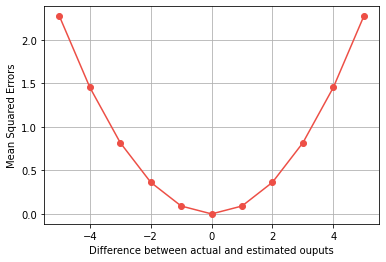

In [4]:
errors = np.arange(-5, 6)
n = len(errors)

mse = (errors**2)/n

plt.plot(errors, mse, c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Squared Errors')
plt.show()

## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. 

Like MSE, this as well measures the magnitude of error without considering their direction. 

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [5]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 16ms/step - loss: 22.4356 - mae: 22.4356 - val_loss: 20.9281 - val_mae: 20.9281
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 21.4207 - mae: 21.4207 - val_loss: 19.8135 - val_mae: 19.8135
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 19.9406 - mae: 19.9406 - val_loss: 17.8017 - val_mae: 17.8017
Epoch 4/250
12/12 [==============================] - 0s 4ms/step - loss: 17.2400 - mae: 17.2400 - val_loss: 14.5229 - val_mae: 14.5229
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 13.1809 - mae: 13.1809 - val_loss: 9.8382 - val_mae: 9.8382
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 8.3350 - mae: 8.3350 - val_loss: 5.7934 - val_mae: 5.7934
Epoch 7/250
12/12 [==============================] - 0s 4ms/step - loss: 5.7975 - mae: 5.7975 - val_loss: 4.8332 - val_mae: 4.8332
Epoch 8/250
12/12 [==============================] - 0s 4ms/step

## Question 2

Now that you know how MAE works, you need to plot the behavior of MAE for the synthetic errors given.  

### Answer 2

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


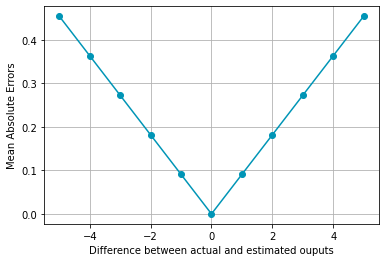

In [6]:
errors = np.arange(-5, 6)
print(errors)
n = len(errors)

mae = (abs(errors))/n

plt.plot(errors, mae, c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Absolute Errors')
plt.show()

## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs because squaring and averaging. 

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [8]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

Epoch 1/150
12/12 [==============================] - 2s 30ms/step - loss: 7.2979 - mean_squared_logarithmic_error: 7.2979 - val_loss: 5.1881 - val_mean_squared_logarithmic_error: 5.1881
Epoch 2/150
12/12 [==============================] - 0s 7ms/step - loss: 4.3372 - mean_squared_logarithmic_error: 4.3372 - val_loss: 3.0748 - val_mean_squared_logarithmic_error: 3.0748
Epoch 3/150
12/12 [==============================] - 0s 13ms/step - loss: 2.5506 - mean_squared_logarithmic_error: 2.5506 - val_loss: 1.6891 - val_mean_squared_logarithmic_error: 1.6891
Epoch 4/150
12/12 [==============================] - 0s 11ms/step - loss: 1.4132 - mean_squared_logarithmic_error: 1.4132 - val_loss: 0.8933 - val_mean_squared_logarithmic_error: 0.8933
Epoch 5/150
12/12 [==============================] - 0s 8ms/step - loss: 0.7722 - mean_squared_logarithmic_error: 0.7722 - val_loss: 0.4873 - val_mean_squared_logarithmic_error: 0.4873
Epoch 6/150
12/12 [==============================] - 0s 10ms/step - loss

## Question 3

Now that you know how MSLE works, you need to plot the behavior of MSLE for the synthetic errors given.  

### Answer 3

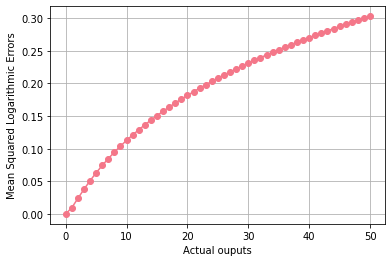

In [10]:
actual_outputs = np.arange(0, 51)
ao_edited = actual_outputs + 1
n = len(actual_outputs)
estimated_outputs = np.zeros(n)
eo_edited = estimated_outputs + 1

msle = ((np.log(ao_edited))**2)/n

plt.plot(actual_outputs, msle, c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual ouputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()

## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$? 

We add the "1" to the outputs before passing it through $\log()$ in order to insure that the output is actually within the range of the function (log(1) = 0).

## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions. 

The behavior of MSE results in a quadratic graph, while the behavior of MAE results in an absolute value graph and the behavior of MSLE results in a logarithmic graph. MSE performed the worst, with a final loss value of around 5.5, while MAE performed much better with a final loss value of roughly 0.996, and MSLE performed the best with a final loss value of roughly 0.155, even after running through only 150 epochs and the others had run through 250.

## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see if the difference in model performance as compared to MSE, MAE, and MSLE.

I chose the Mean Absolute Percentage Error model, which had a final loss value of 4.8546 after 250 epochs. The model performed slightly better than the MSE, but worse than both MAE and MSLE.

In [11]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss= tf.keras.losses.MeanAbsolutePercentageError(),
              metrics=['mean_absolute_percentage_error'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 17ms/step - loss: 97.0596 - mean_absolute_percentage_error: 97.0596 - val_loss: 92.8660 - val_mean_absolute_percentage_error: 92.8660
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 89.0006 - mean_absolute_percentage_error: 89.0006 - val_loss: 81.2476 - val_mean_absolute_percentage_error: 81.2476
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 74.1411 - mean_absolute_percentage_error: 74.1411 - val_loss: 63.1802 - val_mean_absolute_percentage_error: 63.1802
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 54.0399 - mean_absolute_percentage_error: 54.0399 - val_loss: 42.9257 - val_mean_absolute_percentage_error: 42.9257
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 36.9660 - mean_absolute_percentage_error: 36.9660 - val_loss: 29.6316 - val_mean_absolute_percentage_error: 29.6316
Epoch 6/250
12/12 [==============================] - 0

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

# Classification Losses

In classification, the outputs are in form of a class or a category. The label or number assigned to the classes do not have a numerical meaning. 

For example, an input with class label 0 cannot be numerically compared with an input with class label 1. 

In [12]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

169017344/169001437 [==============================] - 3s 0us/step


## Kullback-Leibler Divergence [KDL]

Kullback Leibler Divergence Loss is a measure of how a distribution varies from a reference distribution (or a baseline distribution). A Kullback Leibler Divergence Loss of zero means that both the probability distributions are identical.

The number of information lost in the predicted distribution is used as a measure.

$$KDL(p||q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx$$

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 18s 6ms/step - loss: 437.4927 - accuracy: 0.0144 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4918 - accuracy: 0.0196 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4919 - accuracy: 0.0197 - val_loss: 437.4907 - val_accuracy: 0.0500
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 437.4920 - accuracy: 0.0178 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4919 - accuracy: 0.0200 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 437.4924 - accuracy: 0.0179 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 437.4918 - accu

##Binary Cross Entropy
Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.

Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation. Formally, this loss is equal to the average of the categorical crossentropy loss on many two-category tasks.

$$BCE = -\frac{1}{N} \sum_{i=1}^N y_i \cdot \log(p(y_i)) + (1-y_i) \cdot \log(1- p(y_i))$$

In [14]:
training_labels = tf.reshape(tf.one_hot(training_labels, 100), [training_labels.shape[0], 100])
print(training_labels.shape)

test_labels = tf.reshape(tf.one_hot(test_labels, 100), [test_labels.shape[0], 100])
print(test_labels.shape)

(50000, 100)
(10000, 100)


In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0422 - accuracy: 0.1416 - val_loss: 0.0354 - val_accuracy: 0.2034
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0331 - accuracy: 0.2649 - val_loss: 0.0319 - val_accuracy: 0.2942
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0310 - accuracy: 0.3233 - val_loss: 0.0307 - val_accuracy: 0.3334
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0297 - accuracy: 0.3566 - val_loss: 0.0297 - val_accuracy: 0.3645
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0288 - accuracy: 0.3809 - val_loss: 0.0287 - val_accuracy: 0.3769
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0279 - accuracy: 0.4019 - val_loss: 0.0280 - val_accuracy: 0.3970
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0273 - accuracy: 0.4164 - val_loss: 0.0278 - val_accuracy

## Question 7

Do you see any problems/errors with the above code? Please describe.

\<*Type your answer here*\>

## Categorical Cross Entropy

This is the most common setting for classification problems. Cross-entropy loss increases as the **predicted probability** strays away from the **actual label**.

Note that we have to compare the probabilities (e.g. [0.20, 0.75, 0.05]) of all the classes with the actual labels (e.g., [0, 1, 0]). The actual labels would be one-hot encoding.

An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.

We are multiplying the log of the actual predicted probability for the ground truth class.

$$CCE = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i)$$ 

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5455 - accuracy: 0.2138 - val_loss: 2.2764 - val_accuracy: 0.2933
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2256 - accuracy: 0.3101 - val_loss: 2.1721 - val_accuracy: 0.3172
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0962 - accuracy: 0.3484 - val_loss: 2.0813 - val_accuracy: 0.3465
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9908 - accuracy: 0.3803 - val_loss: 2.0140 - val_accuracy: 0.3707
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9091 - accuracy: 0.4037 - val_loss: 1.9512 - val_accuracy: 0.3889
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8465 - accuracy: 0.4227 - val_loss: 1.8927 - val_accuracy: 0.4102
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7966 - accuracy: 0.4381 - val_loss: 1.9072 - val_accuracy:

## Question 8

Now that you know how CCE works, you need to code it. It should give the same answer as `tf.keras.metrics.categorical_crossentropy` would.

### Answer 8

In [25]:
def categorical_crossentropy(true, pred):
    
    step0 = np.log(pred)
    step1 = np.multiply(true, step0)
    step2 = np.sum(step1)
    loss = ((-1) / n) * step2

    return loss

true = tf.constant([[0.0, 1.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])
pred = tf.constant([[0.20, 0.70, 0.10],
                    [0.80, 0.05, 0.15],
                    [0.75, 0.10, 0.15],
                    [0.25, 0.15, 0.60]])

loss = categorical_crossentropy(true, pred)
print(loss)

loss = tf.keras.metrics.categorical_crossentropy(true, pred)
loss = tf.reduce_mean(loss)
print(loss)

0.027026003482295016
tf.Tensor(0.34458154, shape=(), dtype=float32)


## Sparse Categorical Cross Entropy

Both, Categorical Cross Entropy [CCE] and Sparse Categorical Cross Entropy [SCCE] have the same loss function. The only difference is the format of $y_i$ (i.e., true labels).

If $y_i$'s are one-hot encoded, we should use CCE. Examples (for a 3-class classification): [1,0,0], [0,1,0], [0,0,1]

But if $y_i$'s are integers, use SCCE. Examples for above 3-class classification problem: [1], [2], [3]

The usage entirely depends on how we load our dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

$$SCCE = -\log(\hat{y}_i)$$ for $i$ where $one\text{-}hot\text{-}encoding[i] = 1$ 

In [26]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5628 - accuracy: 0.2101 - val_loss: 2.3300 - val_accuracy: 0.2778
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1986 - accuracy: 0.3170 - val_loss: 2.1525 - val_accuracy: 0.3315
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0540 - accuracy: 0.3600 - val_loss: 2.0304 - val_accuracy: 0.3628
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9534 - accuracy: 0.3894 - val_loss: 1.9612 - val_accuracy: 0.3828
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8764 - accuracy: 0.4142 - val_loss: 1.9500 - val_accuracy: 0.3941
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8138 - accuracy: 0.4307 - val_loss: 1.8592 - val_accuracy: 0.4190
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7649 - accuracy: 0.4427 - val_loss: 1.8943 - val_accuracy:

## Question 9

What is the difference between a Multi-class and Multi-label Classification problem, and what sort of loss function would we need to learn them?

In Multi-class Classification problems, instances are each classified into only one of the classes, while in Multi-label Classification problems, instances may be classified into more than one class. For Multi-class Classification, Binary Cross-Entropy Loss or Sigmoid Cross-Entropy loss would be useful, and for Multi-label Classification, softmax would be needed.

## Question 10
What is the relationship between Binary Cross entropy and Categorical Cross entropy?

Categorical cross entropy is used for multi-class classification, while binary cross-entropy is used for multi-label classficiation. While both work for binary classification, the data must be hot-encoded for categorical cross-entropy.

## Question 11

What is the relationship between Sparse Cross entropy and Categorical Cross entropy?

The two have the same loss functions, but Categorical cross entropy is used when the data is one-hot encoded, and sparse cross entropy is used when the data contains integers.

# **Upload this Day 9 Colab Notebook to your Github repository under "Day 9" folder. Also add your *Reflection* on today's learning in README.md**

Sources:

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)